In [1]:
# https://towardsdatascience.com/predicting-house-prices-with-machine-learning-62d5bcd0d68f
import numpy as np
import pandas as pd

In [2]:
Train = pd.read_csv('data/train.csv')
Test = pd.read_csv('data/test.csv')

In [ ]:
Train.head(5)

In [ ]:
Test.head(5)

In [3]:
print(Train.shape)
print(Test.shape)

(1460, 81)
(1459, 80)


In [4]:
Train.info()
Train.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
Train.isnull().sum().values.sum()

6965

In [6]:
Train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [7]:
Train.duplicated(subset=None, keep="first")
Train.shape

(1460, 81)

In [ ]:
Train.head()

In [8]:
Train.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [28]:
def get_cols_null_values(df):
    out = list()
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            out.append(col)
    return out


def display_col_values(df, dtype=None):
    cols = df.columns
    for col in cols:
        if dtype and df[col].dtype != dtype:
            continue
        null_count = df[col].isnull().sum()
        n_unique = df[col].nunique()
        if n_unique <= 25:
            print(col, null_count, n_unique, df[col].unique())
        else:
            print(col, null_count, n_unique)

            
def clean_data(df):
    cols = df.columns
    for col in cols:
        null_count = df[col].isnull().sum()
        n_unique = df[col].nunique()
        pass
            
display_col_values(Train.copy())
Train.shape

Id 0 1460
MSSubClass 0 15 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning 0 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage 0 111
LotArea 0 1073
Street 0 2 ['Pave' 'Grvl']
Alley 0 3 ['NA' 'Grvl' 'Pave']
LotShape 0 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 0 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 0 2 ['AllPub' 'NoSeWa']
LotConfig 0 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 0 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 0 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 0 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 0 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 0 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 0 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Over

(1460, 81)

In [19]:
values = {
    "Electrical": "NA",
    "PoolQC": "NA",
    "MiscFeature": "NA",
    "Alley": "NA",
    "Fence": "NA",
    "FireplaceQu": "NA",
    "GarageCond": "NA",
    "GarageType": "NA",
    "GarageArea": 0,
    "GarageYrBlt": "NA",
    "GarageFinish": "NA",
    "GarageQual": "NA",
    "BsmtExposure": "NA",
    "BsmtFinType2": "NA",
    "BsmtFinType1": "NA",
    "BsmtCond": "NA",
    "BsmtQual": "NA",
    "MasVnrArea": 0,
    "MasVnrType": "NA",
    "LotFrontage": 0,
}
len(values)

20

In [11]:
Train.fillna(value=values, inplace=True)
Test.fillna(value=values, inplace=True)

In [29]:
get_cols_null_values(Train)

[]

In [33]:
cols_with_null = get_cols_null_values(Test)

In [63]:
def get_null_col_info(df, dtype=None):
    cols = get_cols_null_values(df)
    for col in cols:
        dtype = df[col].dtype
        null_count = df[col].isnull().sum()
        if dtype == 'object':
            print(col, null_count, df[col].nunique(), dtype, df[col].unique())
        elif dtype == 'float':
            if df[col].nunique() < 20:
                print(col, null_count, df[col].nunique(), dtype, df[col].unique())
            else:
                print(col, null_count, df[col].nunique(), dtype, "many values")

In [65]:
get_null_col_info(Test, dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
for col in cols_with_null:
    #Train[col].fillna(Train[col].mode()[0], inplace=True)
    Test[col].fillna(Test[col].mode()[0], inplace=True)

In [54]:
get_null_col_info(Test, dtype='object')

MSZoning 0 5 object ['RH' 'RL' 'RM' 'FV' 'C (all)']
Utilities 0 1 object ['AllPub']
Exterior1st 0 13 object ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' 'CBlock']
Exterior2nd 0 15 object ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn'
 'Stone']
KitchenQual 0 4 object ['TA' 'Gd' 'Ex' 'Fa']
Functional 0 7 object ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2']
SaleType 0 9 object ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD']


In [66]:
get_null_col_info(Test, dtype='object')

In [67]:
# some basement values are set to NANs when they should be zero
Basementmetrics = [
    "BsmtHalfBath",
    "BsmtFullBath",
    "BsmtFinSF1",
    "GarageCars",
    "TotalBsmtSF",
    "BsmtUnfSF",
    "BsmtFinSF2",
]

for Basementmetrics in Basementmetrics:
    Train.loc[(Train[Basementmetrics].isnull()), Basementmetrics] = 0
    Test.loc[(Test[Basementmetrics].isnull()), Basementmetrics] = 0

In [68]:
print(Train.isna().sum())
print(Test.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [36]:
features = Train.select_dtypes(include=["object"]).columns
features
len(features)

44

In [69]:
display_col_values(Train, dtype='object')

MSZoning 0 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 0 2 ['Pave' 'Grvl']
Alley 0 3 ['NA' 'Grvl' 'Pave']
LotShape 0 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 0 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 0 2 ['AllPub' 'NoSeWa']
LotConfig 0 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 0 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 0 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 0 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 0 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 0 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 0 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 0 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 0 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran'

In [70]:
Train.YearBuilt = Train.YearBuilt.astype(str)
Test.YearBuilt = Test.YearBuilt.astype(str)

Train.YrSold = Train.YrSold.astype(str)
Test.YrSold = Test.YrSold.astype(str)

Train.GarageYrBlt = Train.GarageYrBlt.astype(str)
Test.GarageYrBlt = Test.GarageYrBlt.astype(str)

Train.YearRemodAdd = Train.YearRemodAdd.astype(str)
Test.YearRemodAdd = Test.YearRemodAdd.astype(str)


# MSSUbCLass, Overallcond & OverallQual: we will decode this to avoid numeric mix-up
MSSUbCLass = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}


OverallQualCond = {
    10: "Very Excellent",
    9: "Excellent",
    8: "Very Good",
    7: "Good",
    6: "Above Average",
    5: "Average",
    4: "Below Average",
    3: "Fair",
    2: "Poor",
    1: "Very Poor",
}


Train.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)
Test.replace(
    {
        "OverallQual": OverallQualCond,
        "OverallCond": OverallQualCond,
        "MSSubClass": MSSUbCLass,
    },
    inplace=True,
)


print("Test", Test.shape, "Train", Train.shape)

Test (1459, 80) Train (1460, 81)


In [79]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
LotFrontage,1460.0,57.623288,34.664304,0.000000,42.000000,63.000000,79.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
MasVnrArea,1460.0,103.117123,180.731373,0.000000,0.000000,0.000000,164.250000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.0,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000
BsmtUnfSF,1460.0,567.240411,441.866955,0.000000,223.000000,477.500000,808.000000,2336.000000
TotalBsmtSF,1460.0,1057.429452,438.705324,0.000000,795.750000,991.500000,1298.250000,6110.000000
1stFlrSF,1460.0,1162.626712,386.587738,334.000000,882.000000,1087.000000,1391.250000,4692.000000
2ndFlrSF,1460.0,346.992466,436.528436,0.000000,0.000000,0.000000,728.000000,2065.000000


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


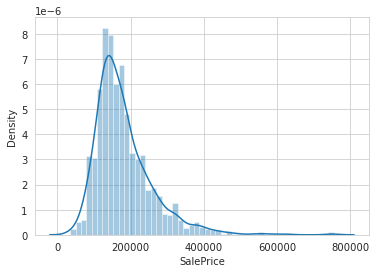

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


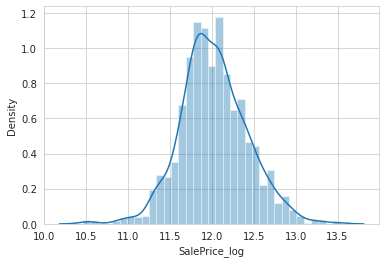

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = Train.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

Train["SalePrice_log"] = np.log(Train.SalePrice)
x = Train.SalePrice_log
sns.distplot(x)
plt.show()

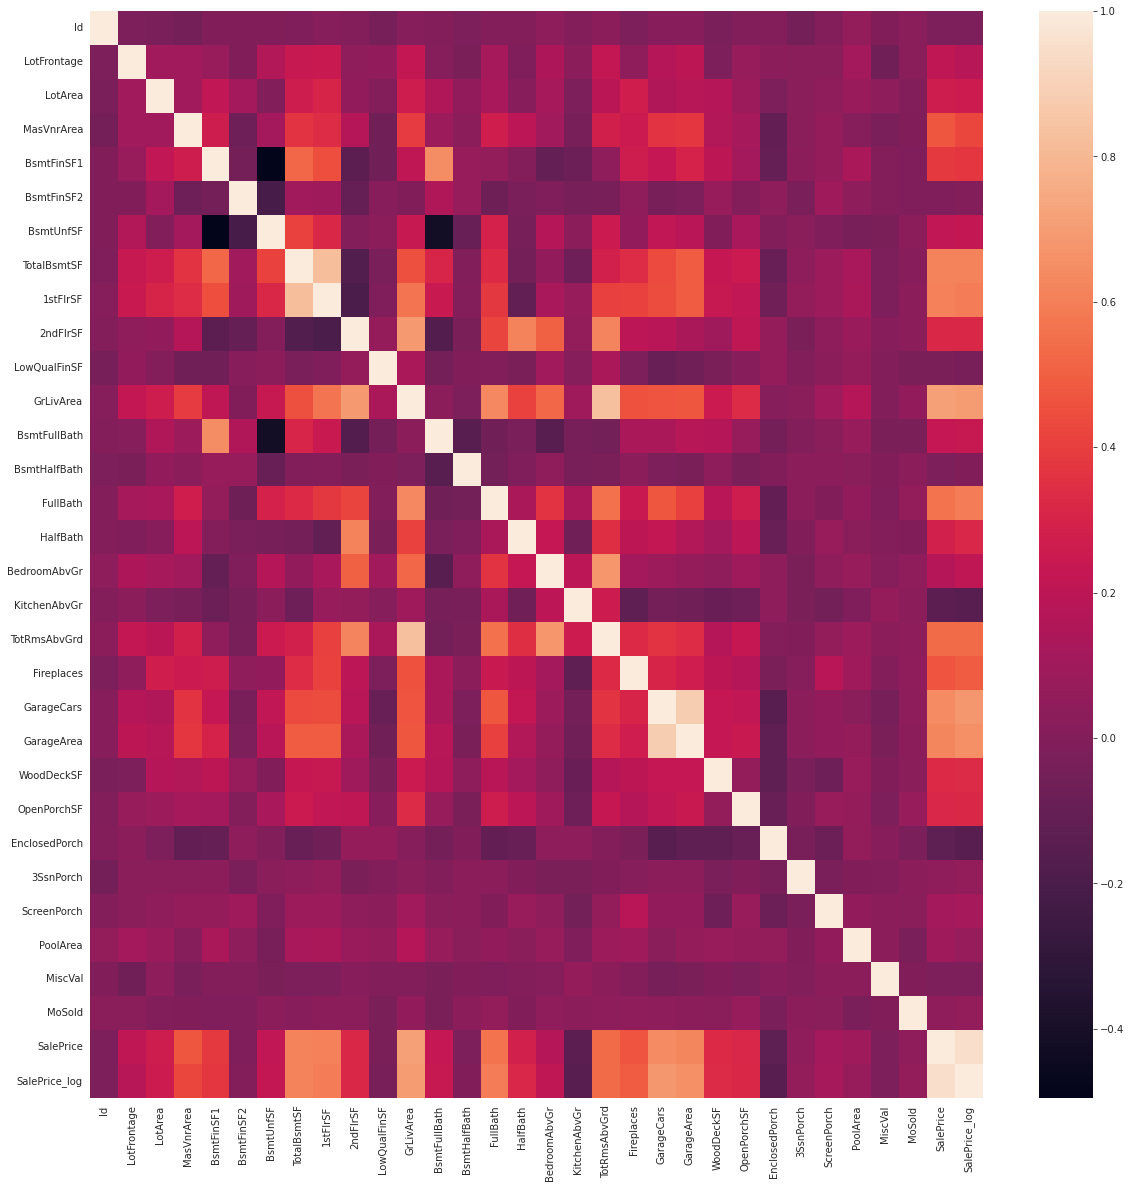

In [74]:
plt.figure(figsize=(20, 20))
sns.heatmap(Train.corr())
plt.savefig("pearsonsmep.png")

/tmp/ipykernel_1919/3200981613.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


<Figure size 720x720 with 0 Axes>

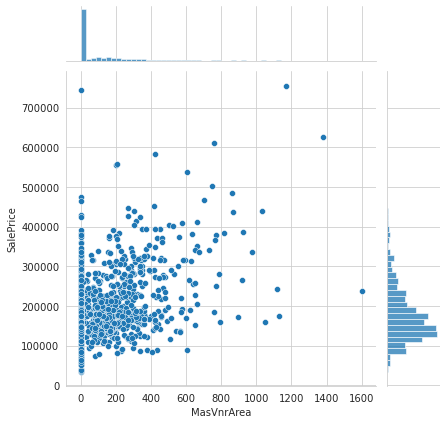

<Figure size 720x720 with 0 Axes>

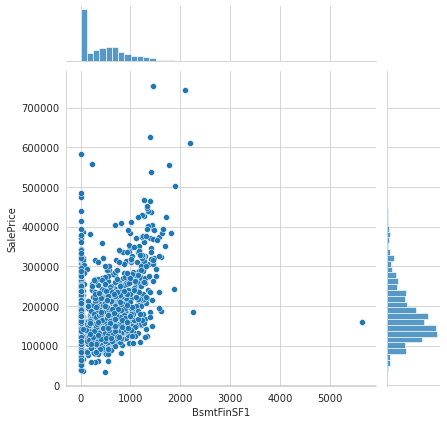

<Figure size 720x720 with 0 Axes>

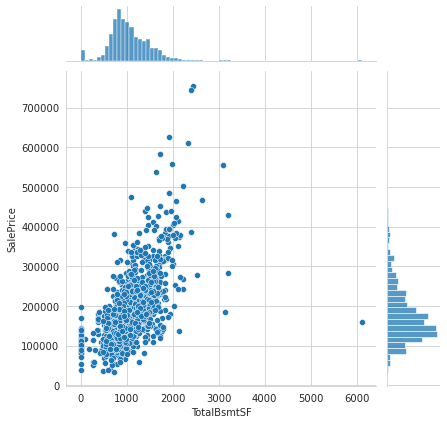

<Figure size 720x720 with 0 Axes>

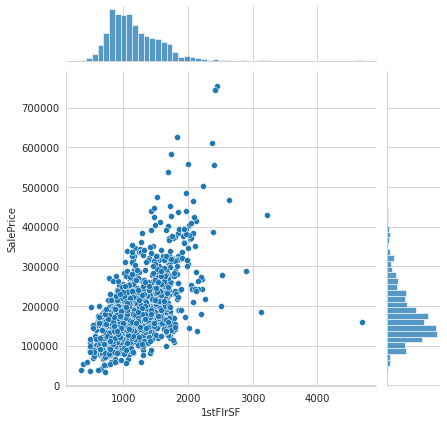

<Figure size 720x720 with 0 Axes>

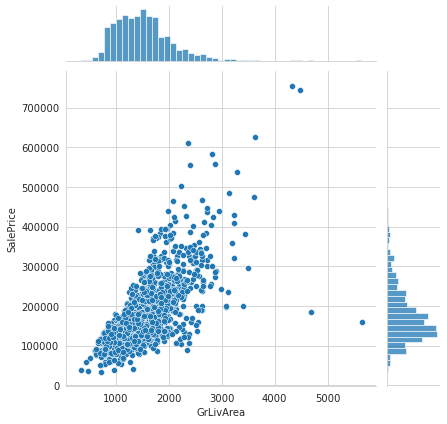

<Figure size 720x720 with 0 Axes>

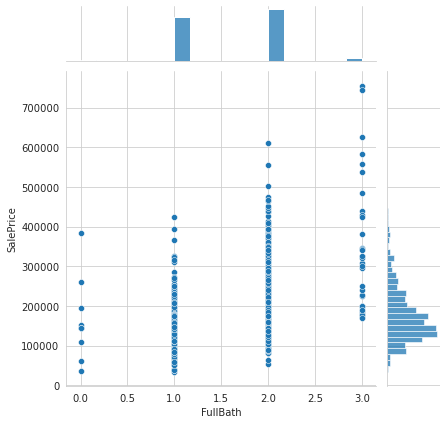

<Figure size 720x720 with 0 Axes>

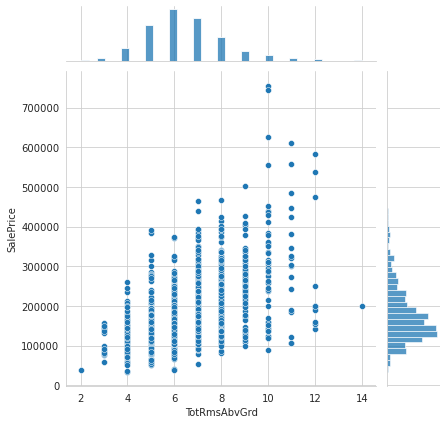

<Figure size 720x720 with 0 Axes>

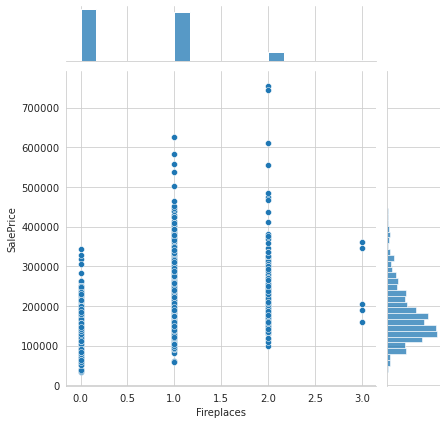

<Figure size 720x720 with 0 Axes>

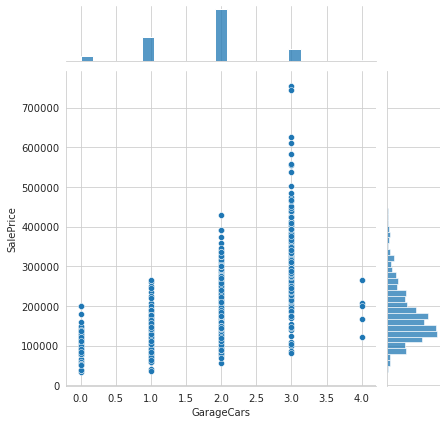

<Figure size 720x720 with 0 Axes>

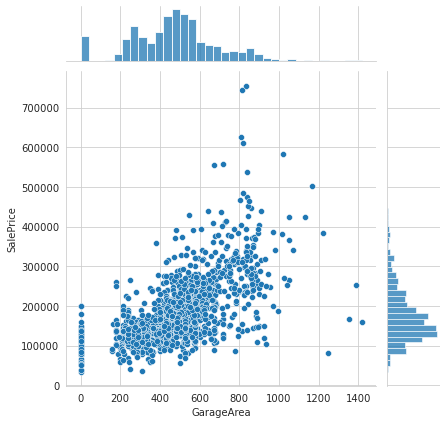

<Figure size 720x720 with 0 Axes>

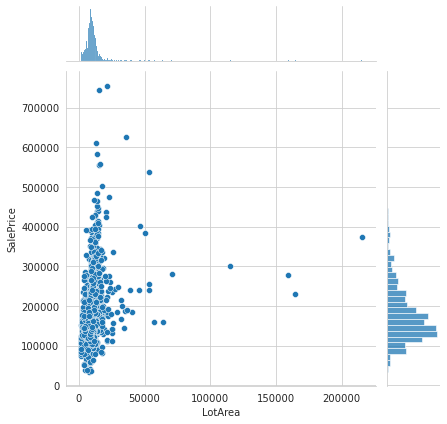

<Figure size 720x720 with 0 Axes>

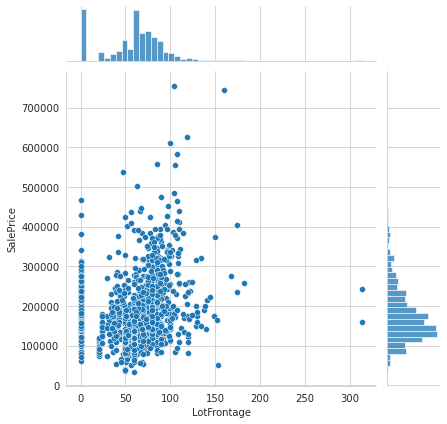

In [75]:
y = Train.SalePrice
features = [
    "MasVnrArea",
    "BsmtFinSF1",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "FullBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageCars",
    "GarageArea",
    "LotArea",
    "LotFrontage",
]

for features in features:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = Train[features]
    sns.jointplot(x=x, y=y, data=Train)

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


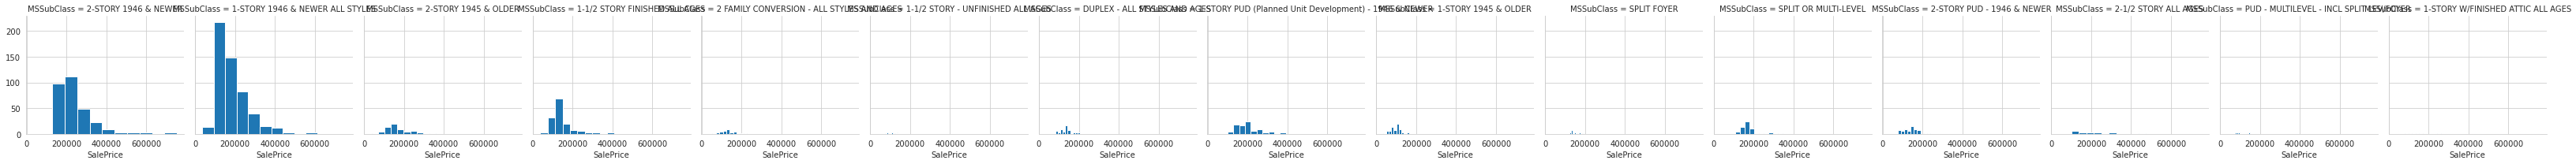

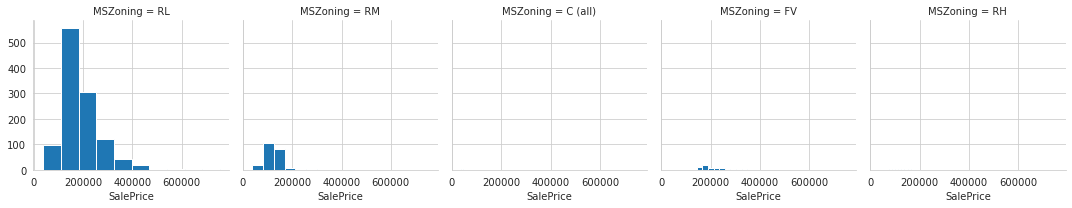

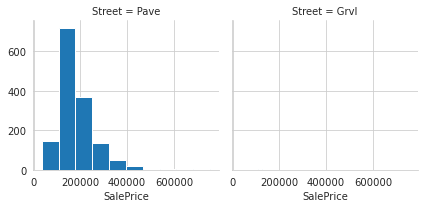

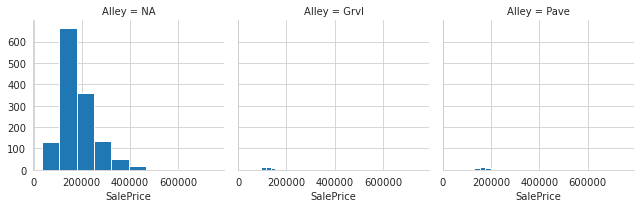

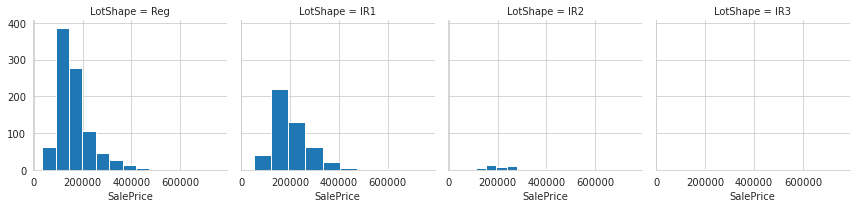

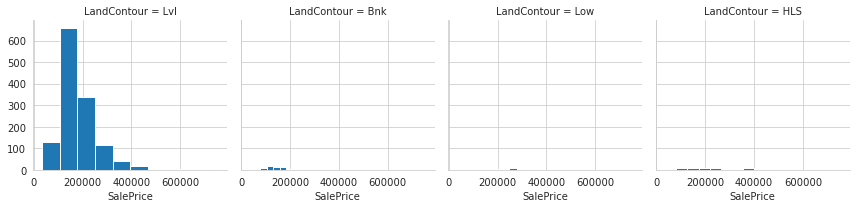

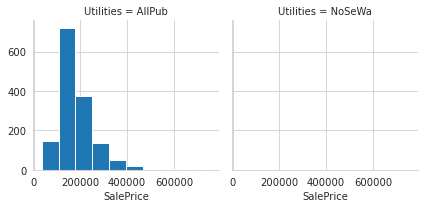

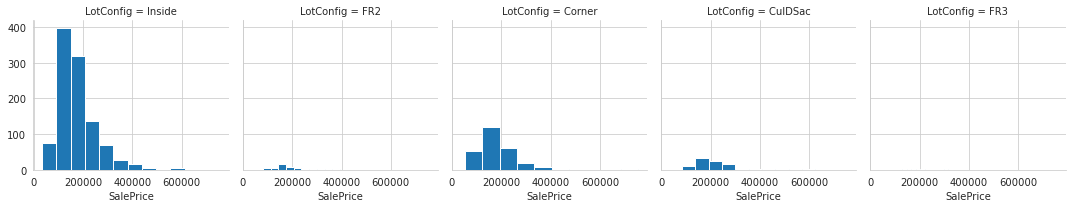

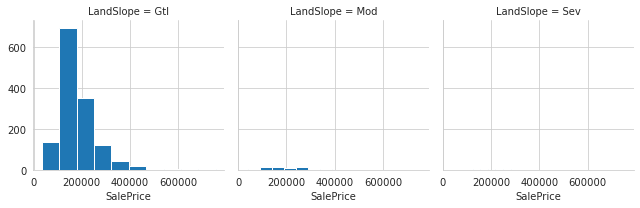

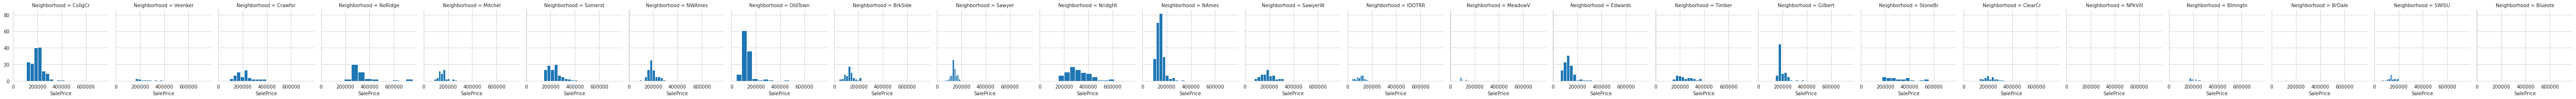

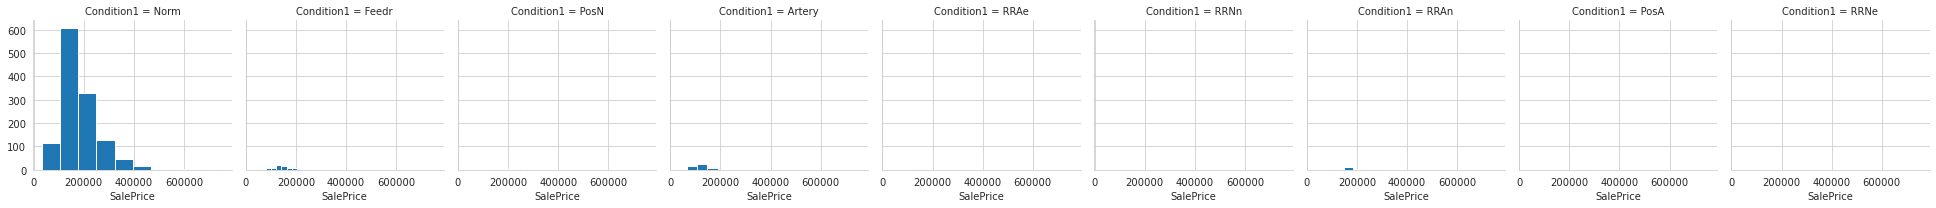

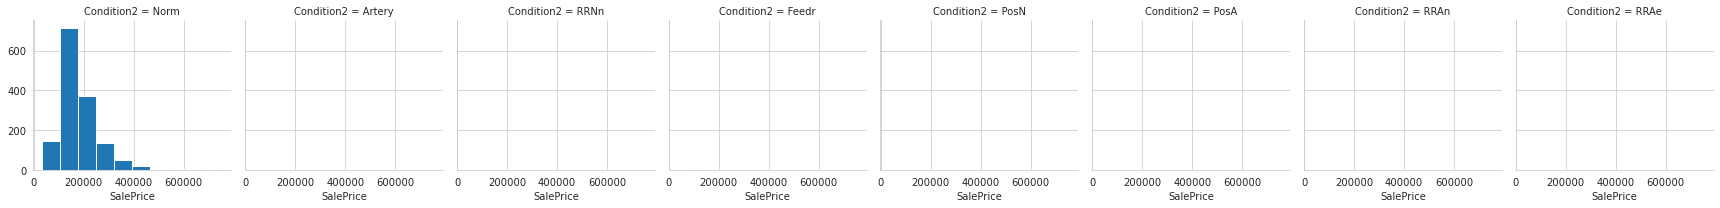

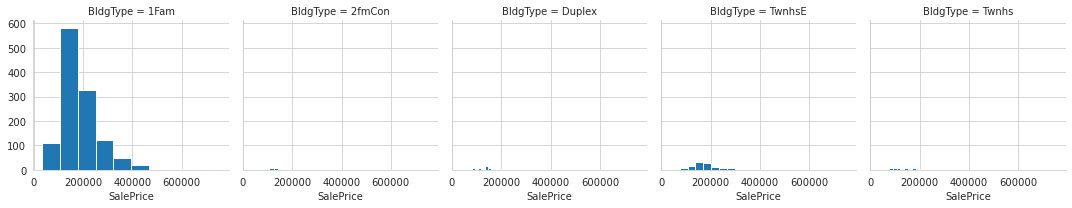

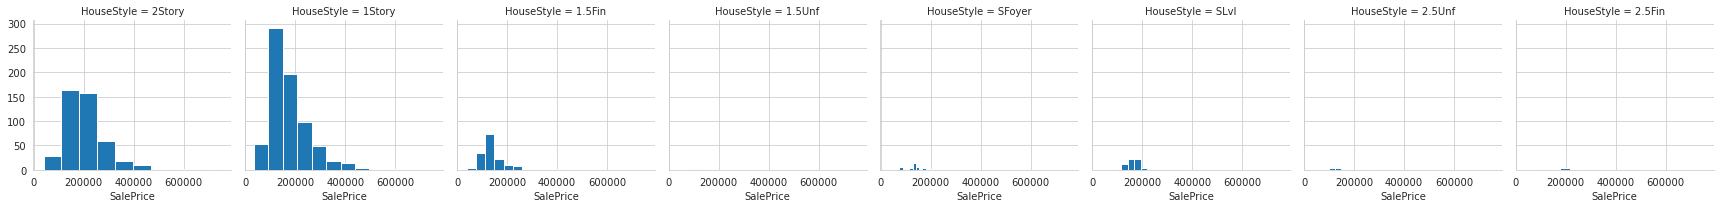

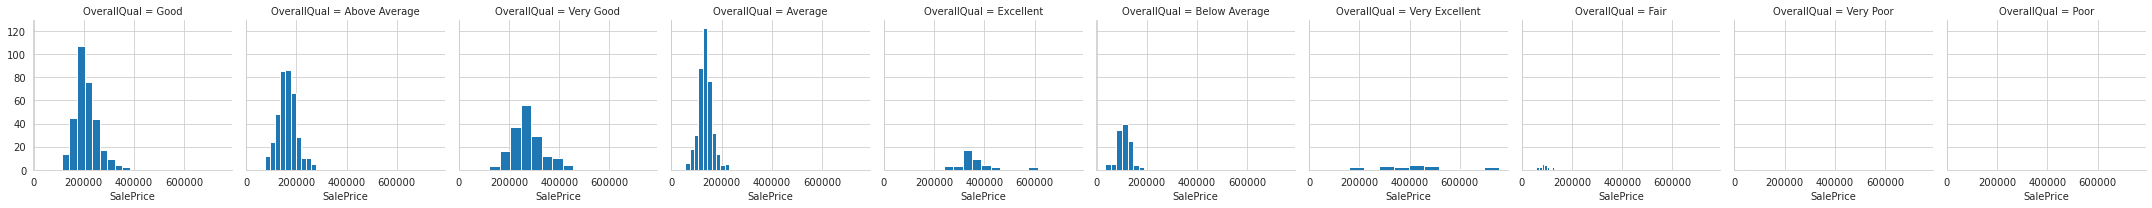

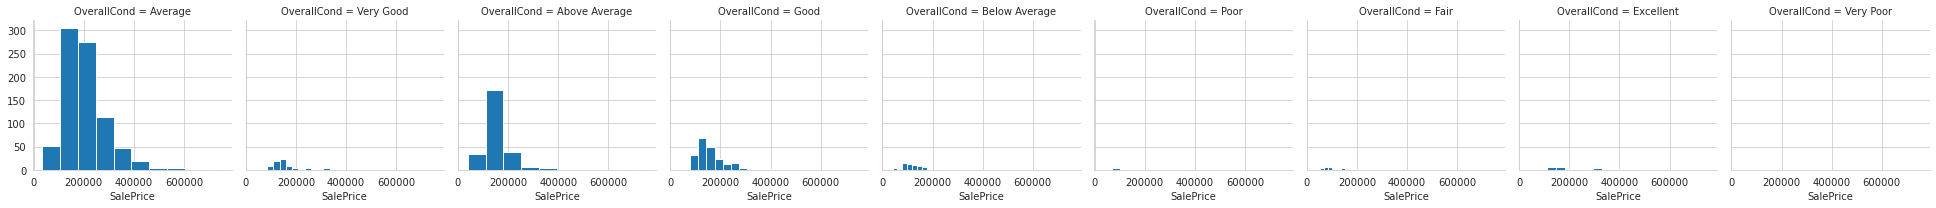

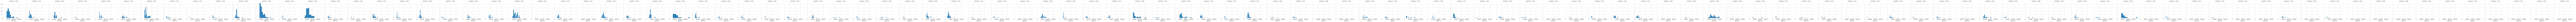

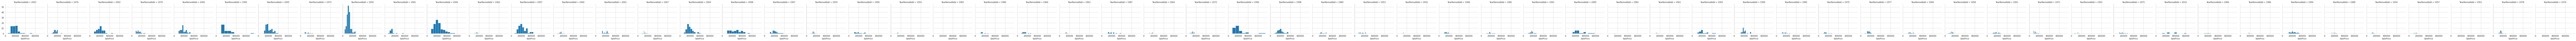

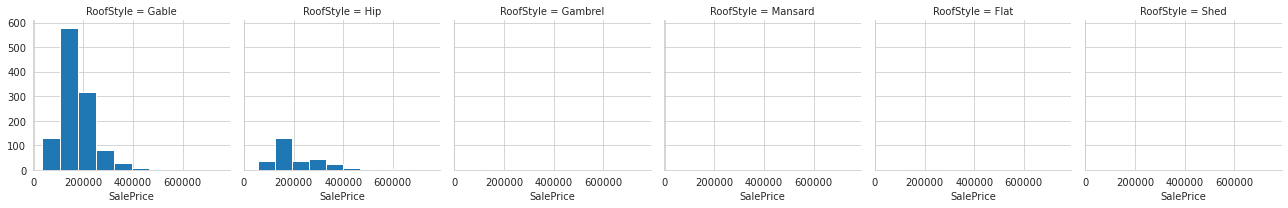

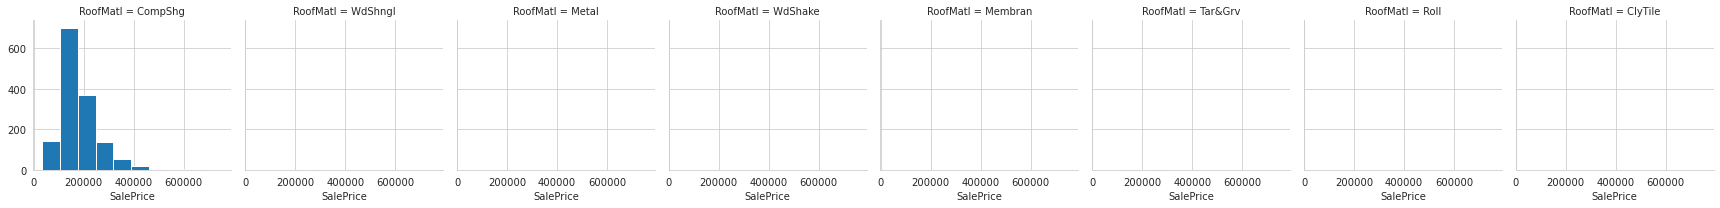

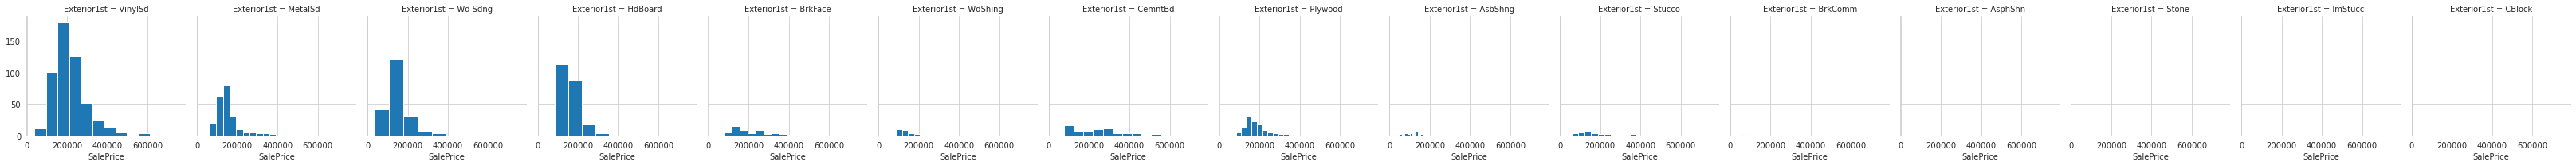

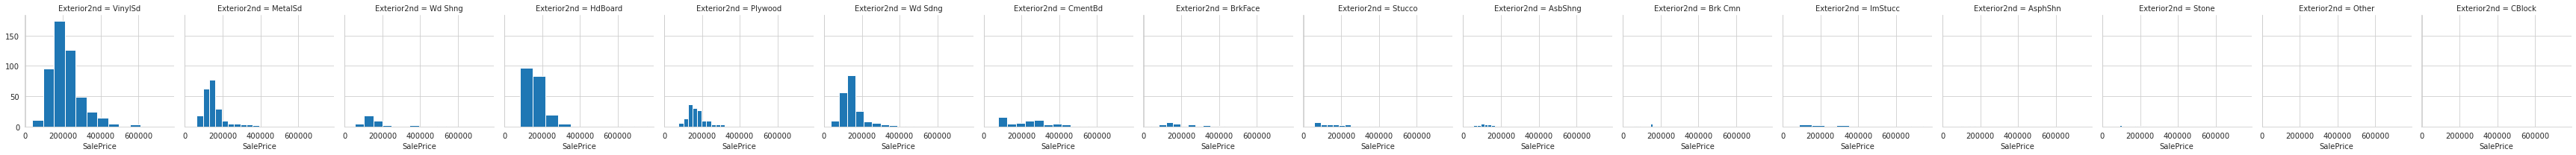

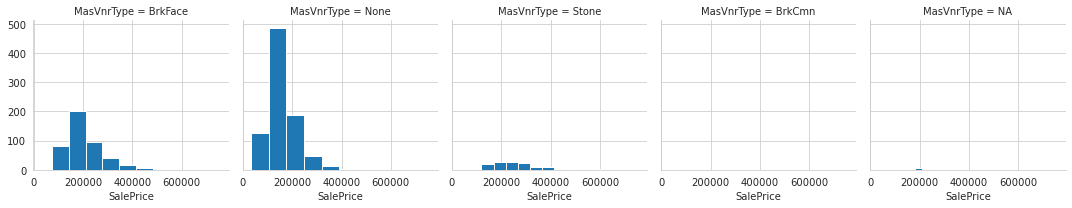

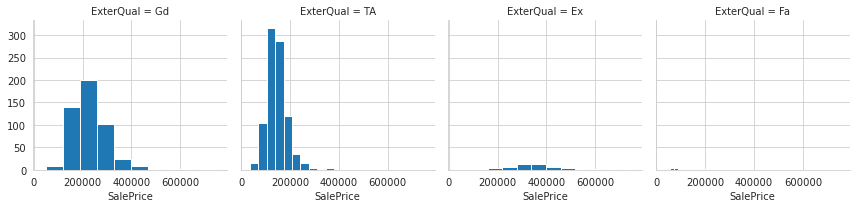

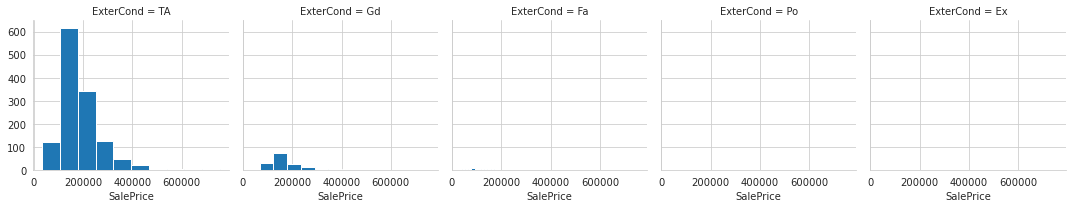

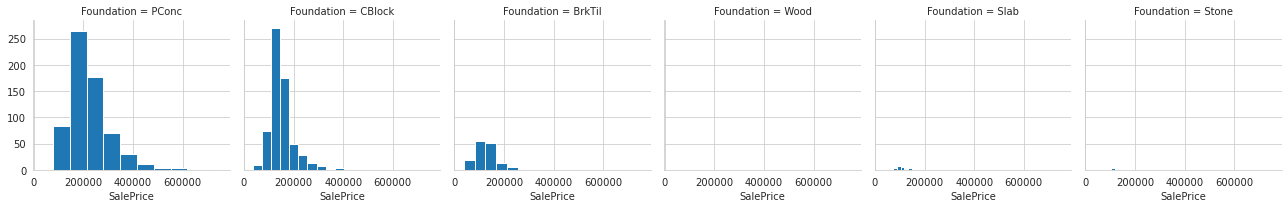

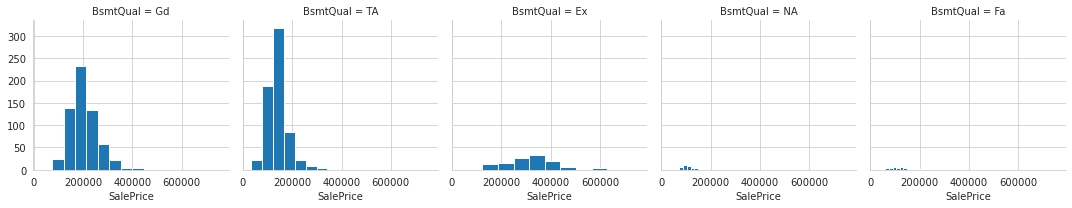

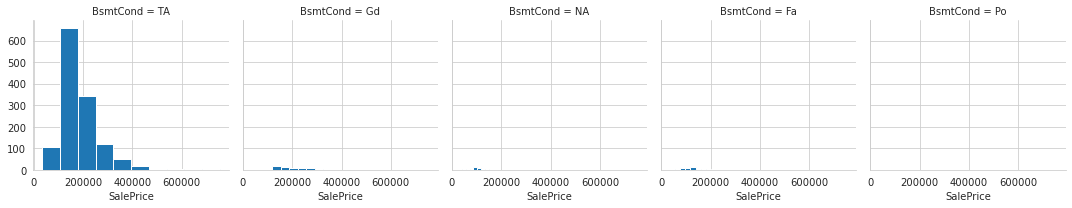

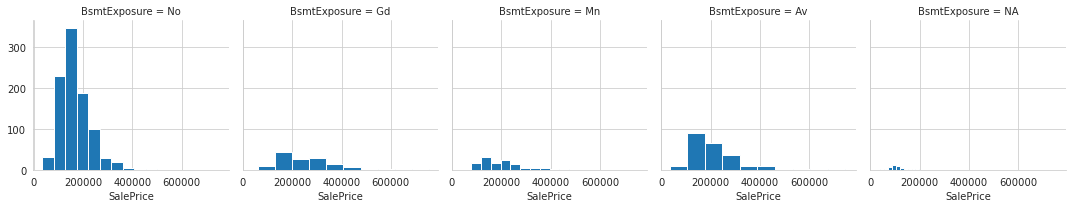

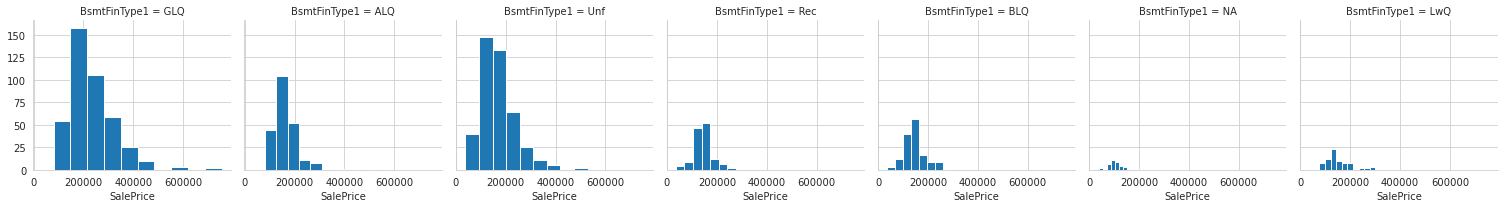

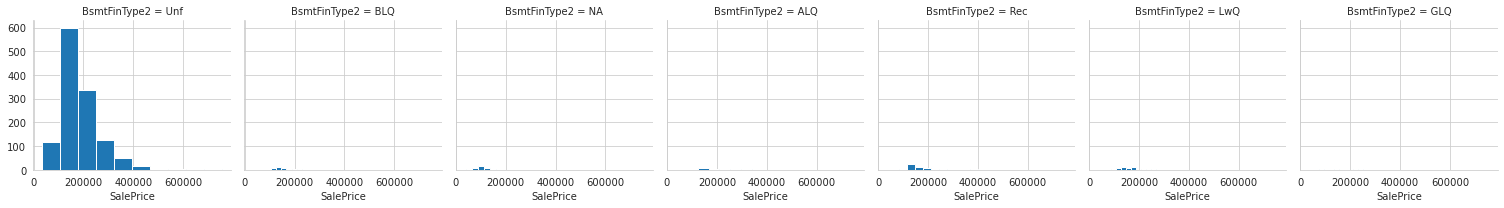

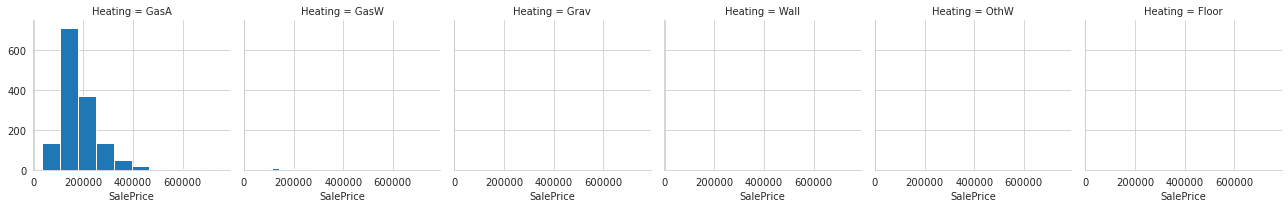

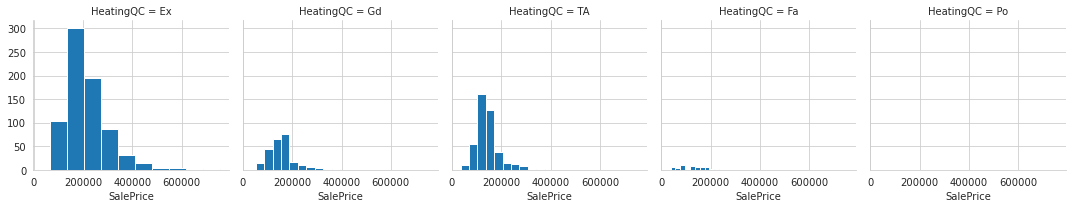

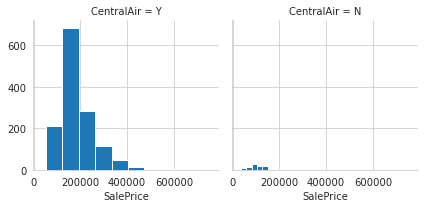

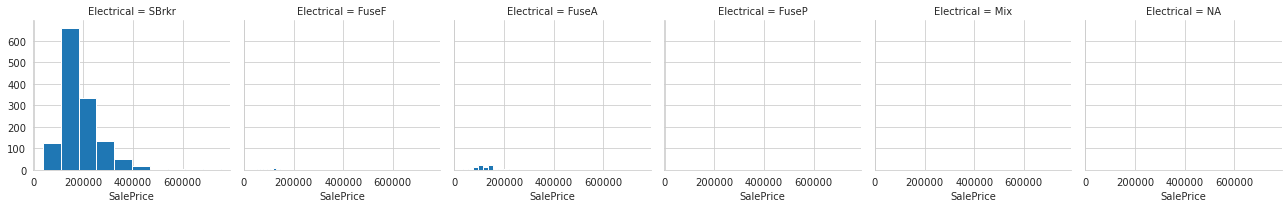

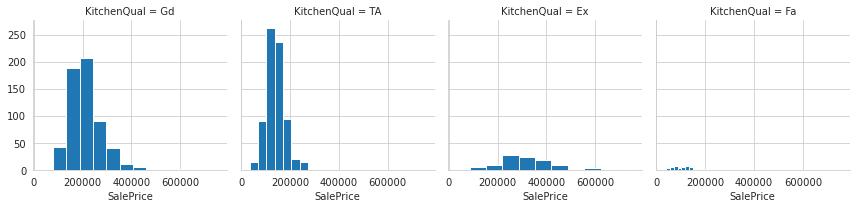

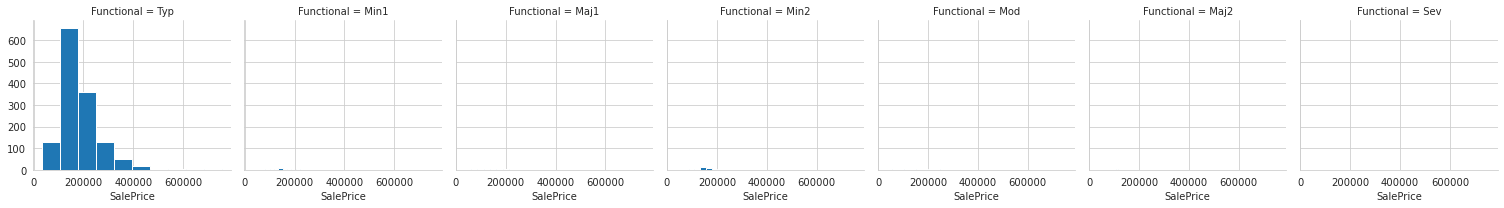

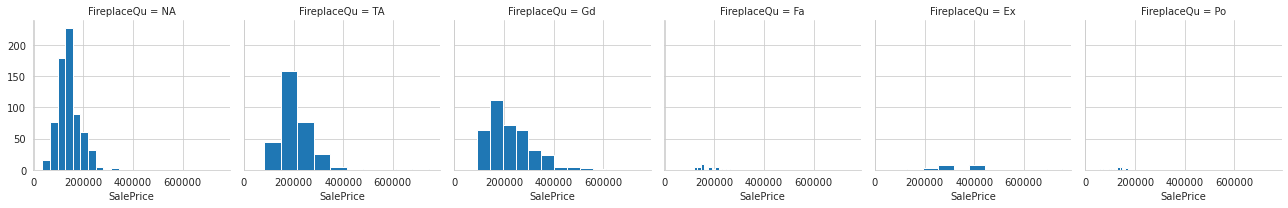

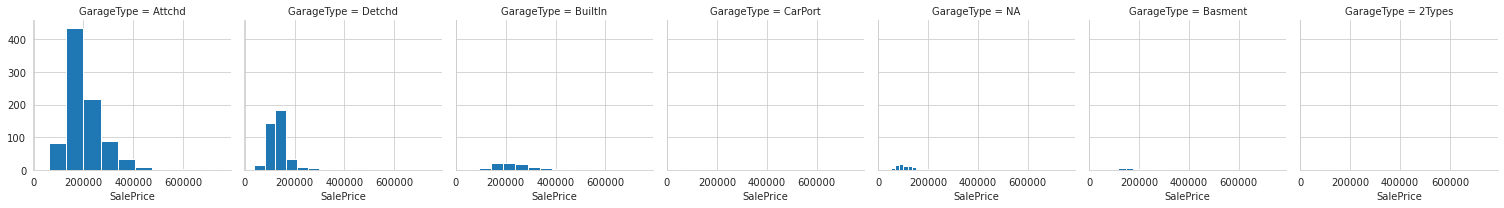

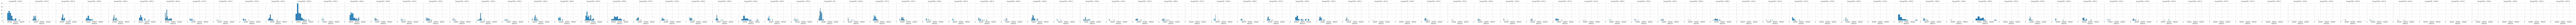

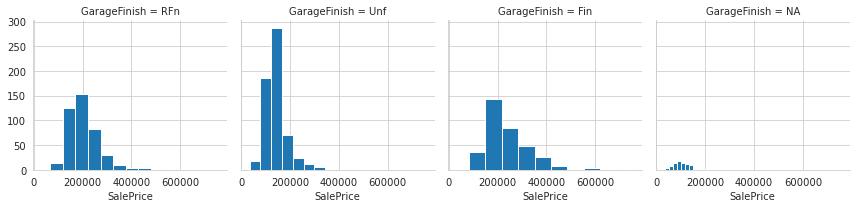

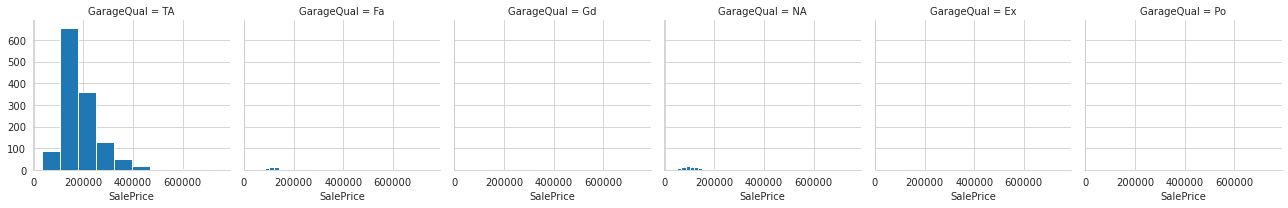

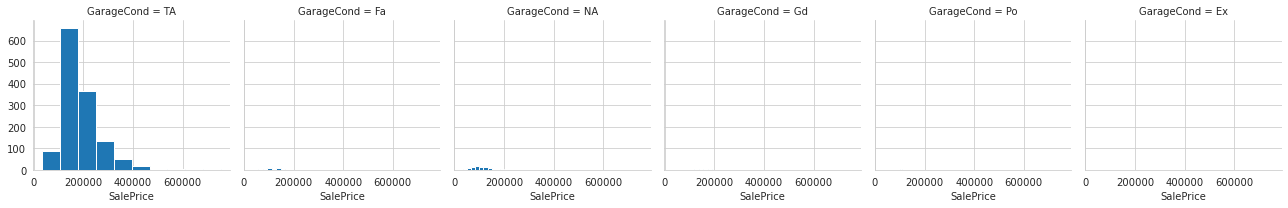

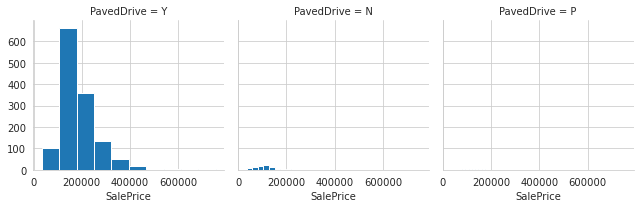

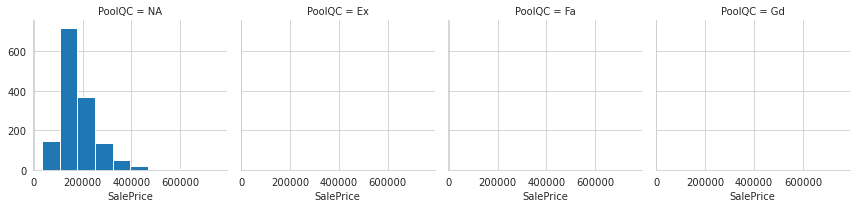

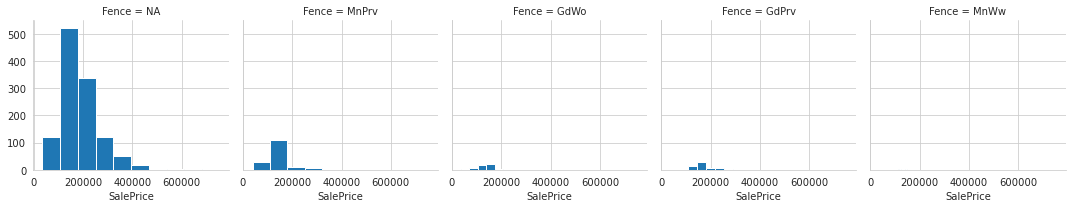

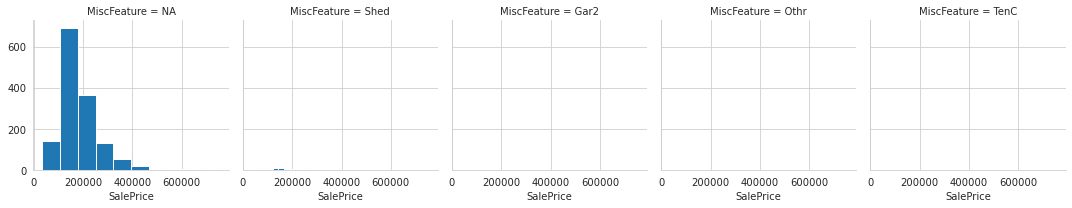

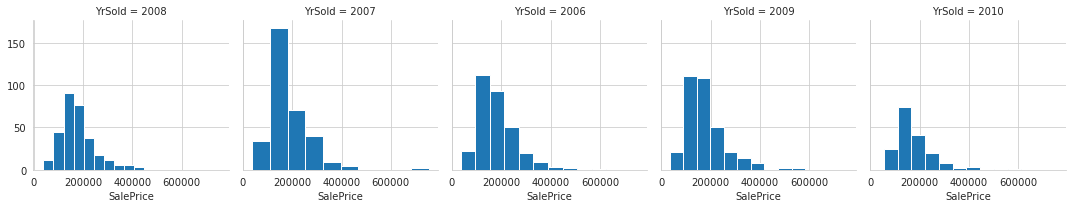

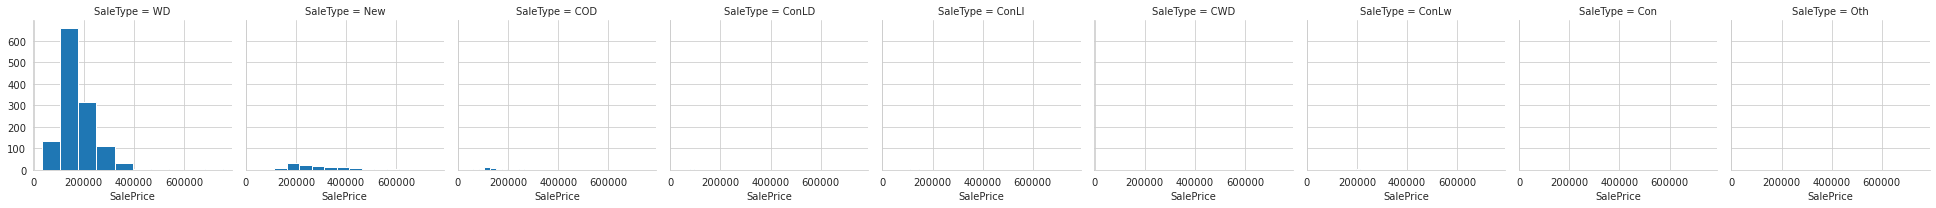

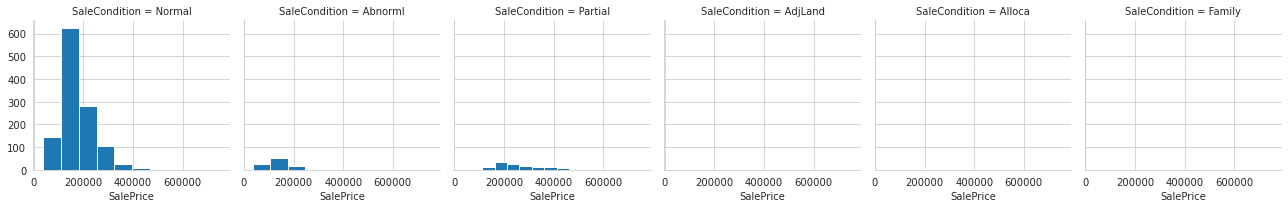

In [76]:
features = Train.select_dtypes(include=['object']).columns

for features in features:
    g = sns.FacetGrid(Train, col=features)
    g.map(plt.hist, 'SalePrice');

In [80]:
import sklearn
# Create a onehotencoder object that relables columns after transforming
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder


# Wrapper for one hot encoder to allow labelling of encoded variables
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(
            sparse_matrix.toarray(), columns=new_columns, index=X.index
        )
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f"{column}_<{self.categories_[i][j]}>")
                j += 1
        return new_columns


# Define funtion to encode categorrical variables with and rejoin to initial data


def transform(Train, df):

    # isolate categorical features
    cat_columns = df.select_dtypes(include=["object"]).columns
    cat_df = df[cat_columns]

    # isolate the numeric features
    numeric_df = df.select_dtypes(include=np.number)

    # initialise one hot encoder object spcify handle unknown and auto options to keep test and train same size
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    # Fit the endcoder to training data
    ohe.fit(Train[cat_columns])

    # transform input data
    df_processed = ohe.transform(cat_df)

    # concatinate numeric features from orginal tables with encoded features
    df_processed_full = pd.concat([df_processed, numeric_df], axis=1)

    return df_processed_full


# Transform training data to numeric form
Train_encoded = transform(Train, Train)
# Transform test data to numeric form
Test_encoded = transform(Train, Test)

# Check data sets are same width minus the two labels in Train
print("Test", Test_encoded.shape, "Train", Train_encoded.shape)

Test (1459, 608) Train (1460, 610)


In [83]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,2,2008,WD,Normal,208500,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2007,WD,Normal,181500,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,9,2008,WD,Normal,223500,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,12,2008,WD,Normal,250000,12.429216


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam

In [112]:
model = Sequential([
    Input(shape=(607,)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              622592    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 1,319,937
Trainable params: 1,319,937
Non-trainable params: 0
____________________________________________

In [117]:
print(Train_encoded.shape)
X = Train_encoded.drop(['Id', 'SalePrice', 'SalePrice_log'], axis=1).values
print(X.shape)

y = Train_encoded['SalePrice'].values
print(y.shape)

#X = Data.drop('price', axis=1).values
#y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

(1460, 610)
(1460, 607)
(1460,)


In [118]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
X_train.shape

(978, 607)

In [123]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=50,
          epochs=150)

Epoch 1/150
20/20 [==============================] - 0s 14ms/step - loss: 9047486.0000 - val_loss: 1904839680.0000
Epoch 2/150
20/20 [==============================] - 0s 10ms/step - loss: 10957845.0000 - val_loss: 1909825792.0000
Epoch 3/150
20/20 [==============================] - 0s 11ms/step - loss: 16827574.0000 - val_loss: 1906280704.0000
Epoch 4/150
20/20 [==============================] - 0s 11ms/step - loss: 37477324.0000 - val_loss: 1910708608.0000
Epoch 5/150
20/20 [==============================] - 0s 10ms/step - loss: 54361096.0000 - val_loss: 1932158976.0000
Epoch 6/150
20/20 [==============================] - 0s 11ms/step - loss: 67319200.0000 - val_loss: 1977155072.0000
Epoch 7/150
20/20 [==============================] - 0s 10ms/step - loss: 65961488.0000 - val_loss: 1976584832.0000
Epoch 8/150
20/20 [==============================] - 0s 13ms/step - loss: 70715336.0000 - val_loss: 1904616192.0000
Epoch 9/150
20/20 [==============================] - 0s 10ms/step - loss:

<AxesSubplot:>

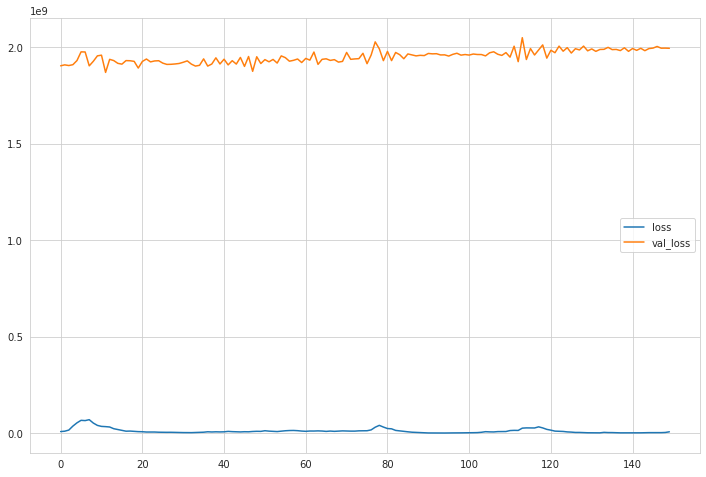

In [124]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [121]:
y_pred = model.predict(X_test)

In [122]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 25569.59
Mean Squared Error: 1901548348.85
Root Mean Squared Error: 43606.75
Variance score is: 0.70
